In [18]:
from PIL import Image
from ultralytics import YOLO
from pathlib import Path

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.25 🚀 Python-3.8.5 torch-1.13.1 CPU
Setup complete ✅ (4 CPUs, 8.0 GB RAM, 211.2/233.5 GB disk)


In [19]:
test_imgs = Path('images/test').glob('*.jpg')
test_imgs = [str(x) for x in test_imgs]
len(test_imgs)

12

In [20]:
model = YOLO(f'models/yolov8m_best.pt')

Inference the 12 test images

In [21]:
%%time
results = model.predict(source=test_imgs, conf=0.6, save=True)

Ultralytics YOLOv8.0.25 🚀 Python-3.8.5 torch-1.13.1 CPU
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

0: 640x640 1 boat, 1: 640x640 2 boats, 2: 640x640 1 boat, 3: 640x640 2 boats, 4: 640x640 1 boat, 5: 640x640 3 boats, 6: 640x640 2 boats, 7: 640x640 1 boat, 8: 640x640 3 boats, 9: 640x640 1 boat, 10: 640x640 1 boat, 11: 640x640 2 boats, 18410.8ms
Speed: 8.7ms pre-process, 1534.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /Users/robin/Github/kaggle-ships-in-Google-Earth/runs/detect/predict2


CPU times: user 16.4 s, sys: 2.51 s, total: 18.9 s
Wall time: 19.5 s


In [22]:
results[0]

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([1, 6])
dtype: torch.float32
 + tensor([[315.00000, 207.00000, 389.00000, 351.00000,   0.88456,   0.00000]])

In [23]:
result_imgs = Path('runs/detect/predict').glob('*.jpg')
result_imgs = [str(x) for x in result_imgs]
len(result_imgs)

12

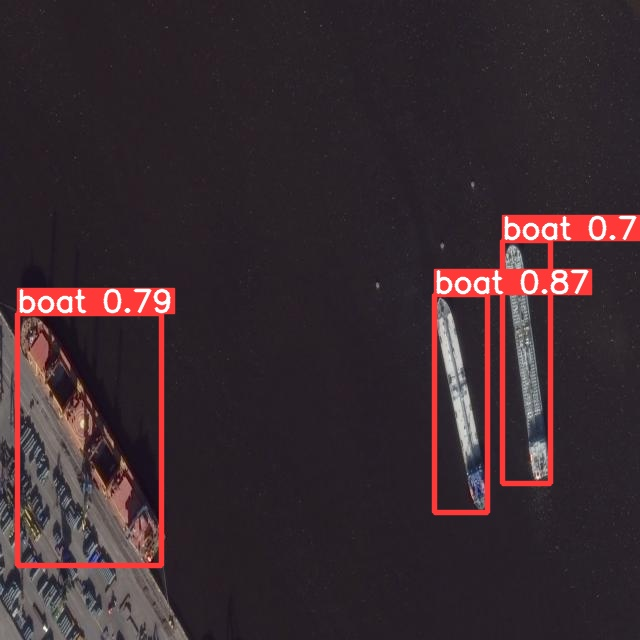

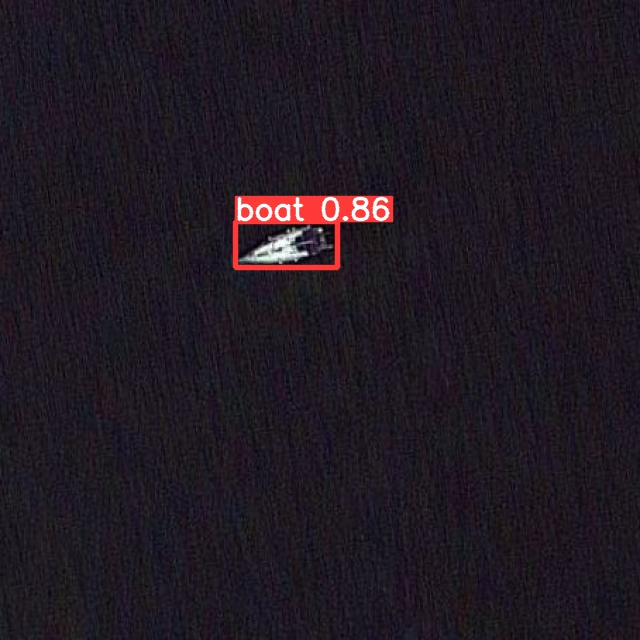

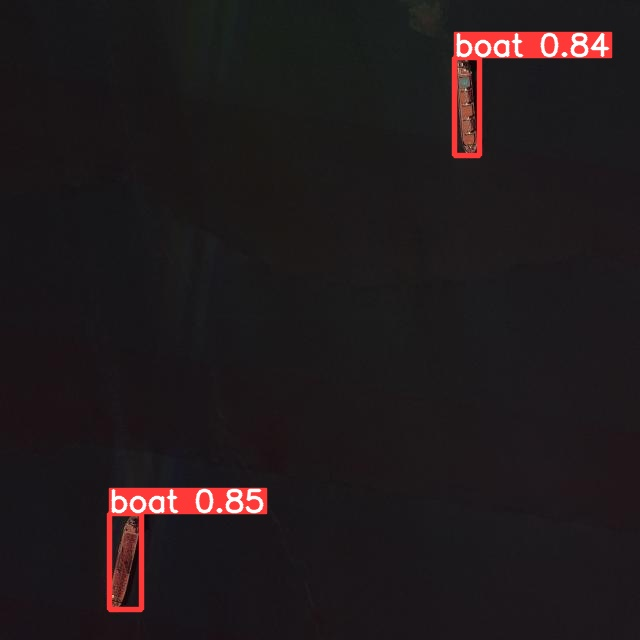

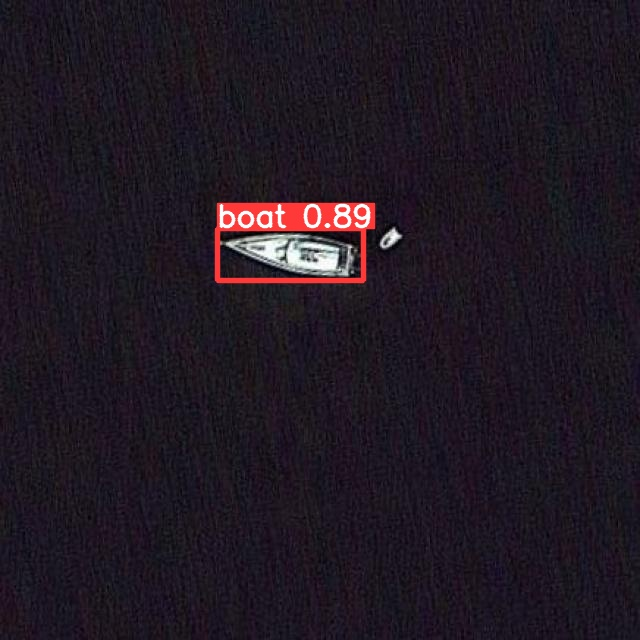

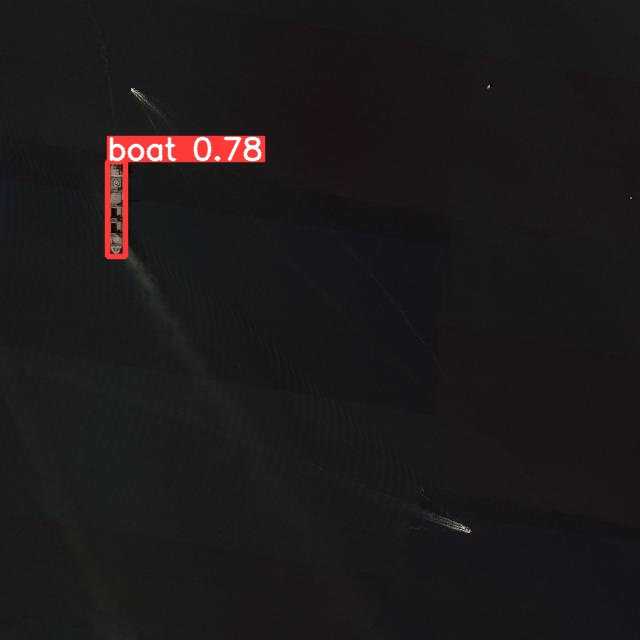

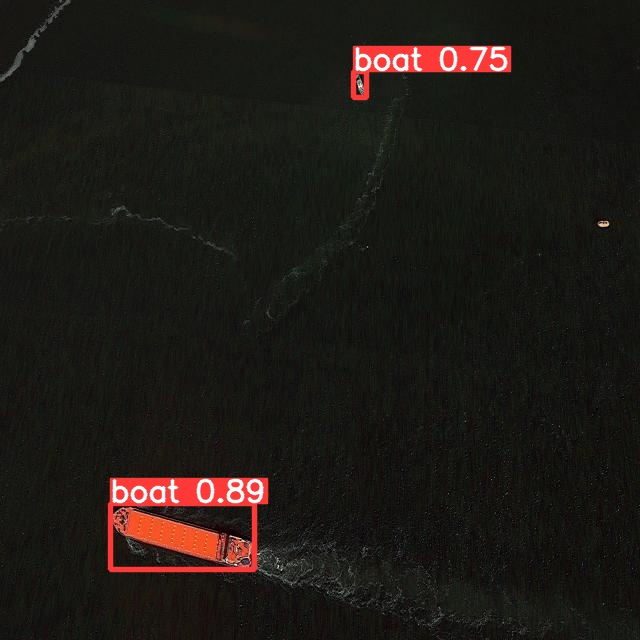

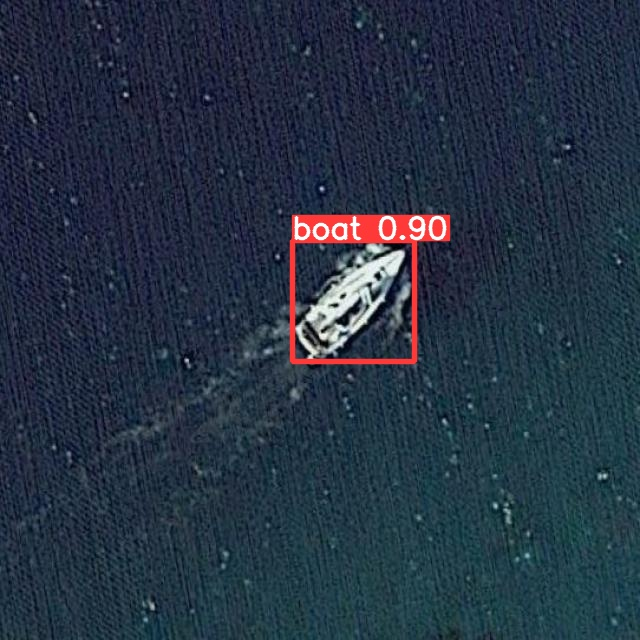

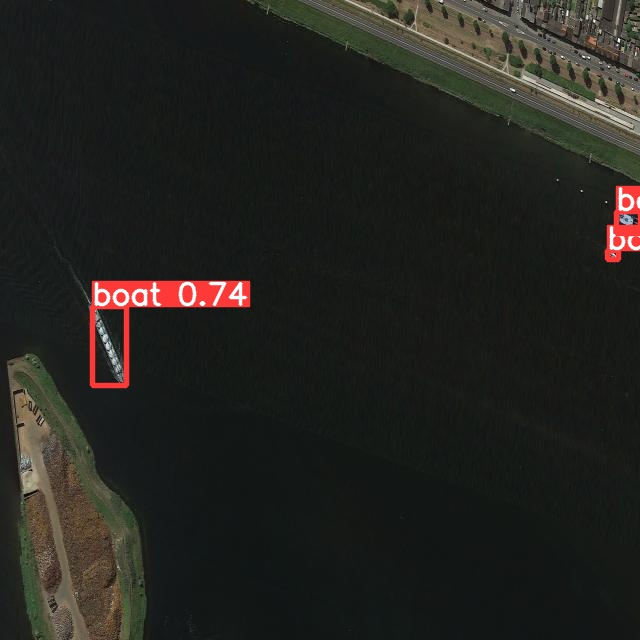

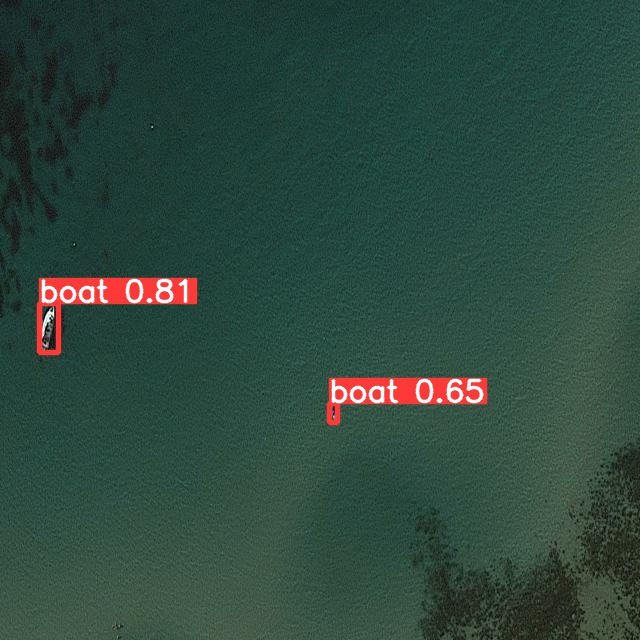

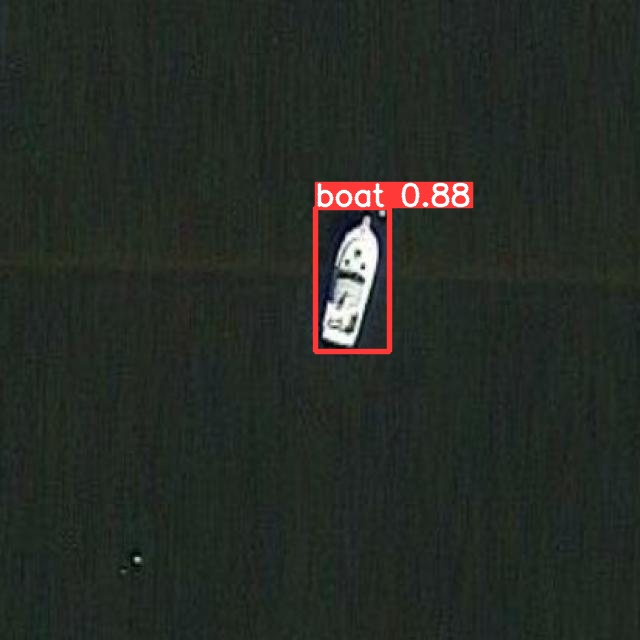

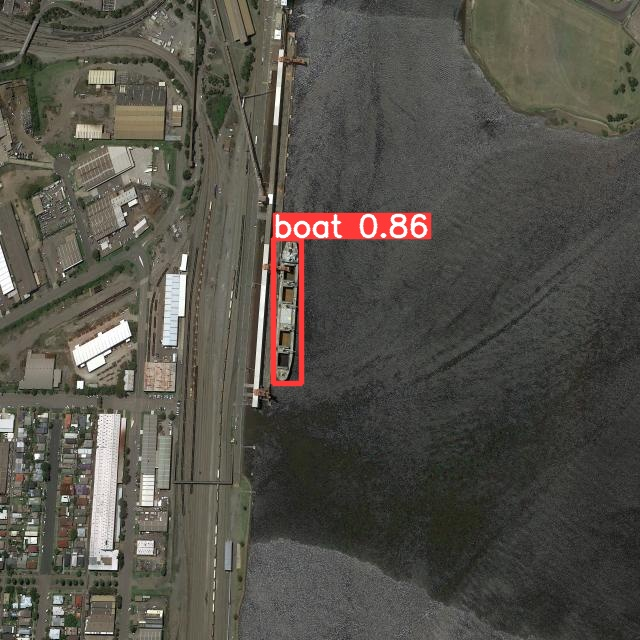

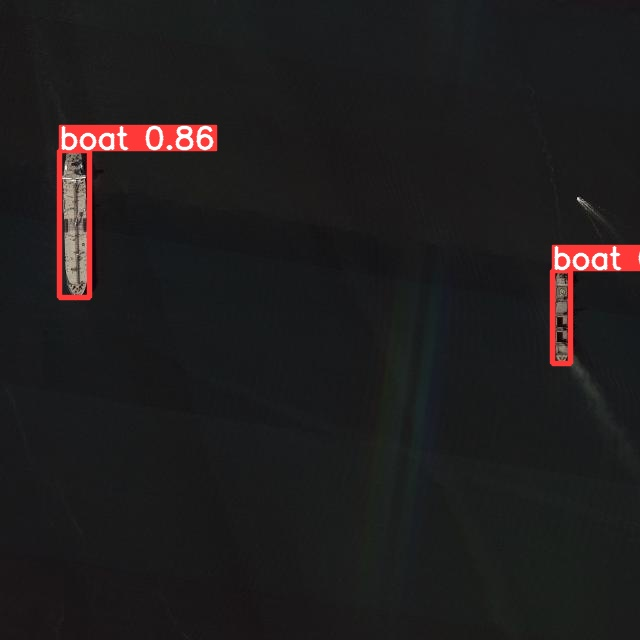

In [24]:
for img in result_imgs:
    display(Image.open(img))